<h1>Apurva Anand<br>
A04285700<br>
Assignment 3 - process tida data<h1>

Importing all required libraries

In [1]:
import xarray as xr
import pandas as pd
from pandas.plotting import autocorrelation_plot
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import math
import scipy.stats
import statsmodels.stats
from scipy.stats import f_oneway
from scipy.stats import norm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import datetime
from datetime import datetime
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The data starts by a header row "date+time,XXX-pwl" where XXX is the historical station number assigned by CBI. "pwl" stands for primary water level measurements typically obtained with an acoustic sensor.<br>

The rest of file consists of rows each representing a 6-minute increment with a time stamp following the ISO 8601 standard, referenced to the Greenwich Meridian Time (GMT) or Zulu Time (Z), and the measurements are in meters referenced to the station's datum:<br>

"YYYY-MM-DDT00:00:00Z",0.000

In [2]:
df1 = pd.read_csv('NuecesBay.csv')
df1

#date+time  185-pwl
0       2010-01-21T00:00:00Z   -0.326
1       2010-01-21T00:06:00Z   -0.322
2       2010-01-21T00:12:00Z   -0.322
3       2010-01-21T00:18:00Z   -0.317
4       2010-01-21T00:24:00Z   -0.320
...                      ...      ...
871675  2019-12-31T23:30:00Z    7.550
871676  2019-12-31T23:36:00Z    7.546
871677  2019-12-31T23:42:00Z    7.542
871678  2019-12-31T23:48:00Z    7.543
871679  2019-12-31T23:54:00Z    7.544

[871680 rows x 2 columns]

Checking for NaNs

In [3]:
check_nan = df1['185-pwl'].isnull().values.any()
 
# printing the result
print (check_nan)

True


In [4]:
df1.isna().sum().sum()

18605

Dropping NaNs

In [5]:
df1 = df1.dropna()
df1

#date+time  185-pwl
0       2010-01-21T00:00:00Z   -0.326
1       2010-01-21T00:06:00Z   -0.322
2       2010-01-21T00:12:00Z   -0.322
3       2010-01-21T00:18:00Z   -0.317
4       2010-01-21T00:24:00Z   -0.320
...                      ...      ...
871675  2019-12-31T23:30:00Z    7.550
871676  2019-12-31T23:36:00Z    7.546
871677  2019-12-31T23:42:00Z    7.542
871678  2019-12-31T23:48:00Z    7.543
871679  2019-12-31T23:54:00Z    7.544

[853075 rows x 2 columns]

Calculating 1st & 99th quantile and using that to remove outliers

In [6]:
q1_low = df1["185-pwl"].quantile(0.01)
q1_hi  = df1["185-pwl"].quantile(0.99)

df1_filtered = df1[(df1["185-pwl"] < q1_hi) & (df1["185-pwl"] > q1_low)]
df1_filtered

#date+time  185-pwl
1160    2010-01-25T20:00:00Z    7.224
1161    2010-01-25T20:06:00Z    7.228
1162    2010-01-25T20:12:00Z    7.226
1163    2010-01-25T20:18:00Z    7.230
1164    2010-01-25T20:24:00Z    7.231
...                      ...      ...
871675  2019-12-31T23:30:00Z    7.550
871676  2019-12-31T23:36:00Z    7.546
871677  2019-12-31T23:42:00Z    7.542
871678  2019-12-31T23:48:00Z    7.543
871679  2019-12-31T23:54:00Z    7.544

[835876 rows x 2 columns]

Converting dates and time to datetime object and converting it into a datetime index

In [7]:
df1_filtered['#date+time'] = pd.to_datetime(df1_filtered['#date+time'], errors='coerce')
data = df1_filtered[['#date+time', '185-pwl']].set_index(['#date+time'])

C:\Users\apurv\AppData\Local\Temp\ipykernel_25412\118080227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered['#date+time'] = pd.to_datetime(df1_filtered['#date+time'], errors='coerce')


<h2>Plotting various Plots for Nueces Bay<h2>

Text(0.5, 1.0, 'Water level through the years at Nueces Bay')

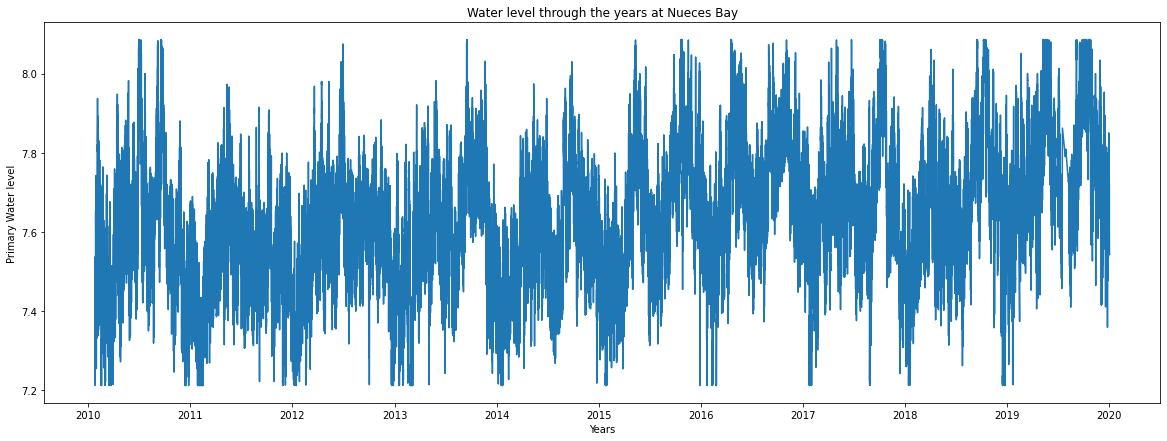

In [8]:
plt.subplots(figsize = (20,7))
plt.plot(df1_filtered['#date+time'], df1_filtered['185-pwl'])
plt.xlabel("Years")
plt.ylabel("Primary Water level")
plt.title("Water level through the years at Nueces Bay")

Text(0.5, 1.0, 'Box Plot of Water level at Neuces Bay')

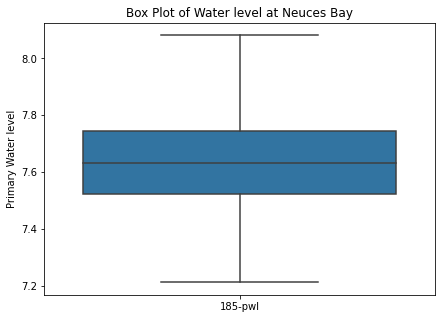

In [9]:
plt.subplots(figsize = (7,5))
sns.boxplot(data = df1_filtered, showfliers = False)
plt.ylabel("Primary Water level")
plt.title("Box Plot of Water level at Neuces Bay")

Text(0.5, 1.0, 'Boxen Plot of Water level at Neuces Bay')

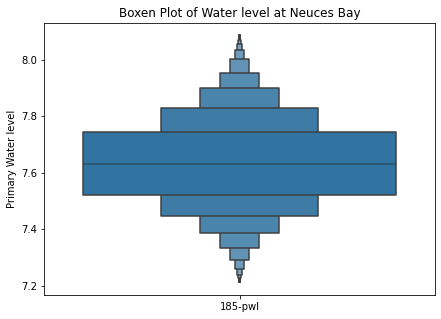

In [10]:
plt.subplots(figsize = (7,5))
sns.boxenplot(data = df1_filtered, showfliers = False)
plt.ylabel("Primary Water level")
plt.title("Boxen Plot of Water level at Neuces Bay")

Text(0.5, 1.0, 'Box Plot of Water level at Neuces Bay')

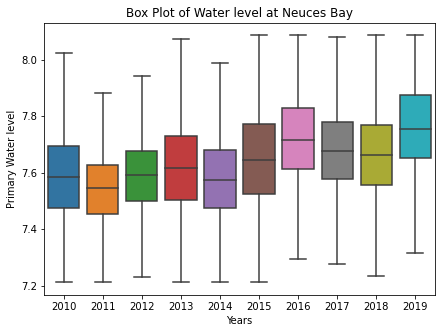

In [11]:
plt.subplots(figsize = (7,5))
sns.boxplot(x= df1_filtered['#date+time'].dt.year, y = df1_filtered['185-pwl'], data = df1_filtered, showfliers = False)
plt.xlabel("Years")
plt.ylabel("Primary Water level")
plt.title("Box Plot of Water level at Neuces Bay")

Text(0.5, 1.0, 'Box Plot of Water level at Neuces Bay')

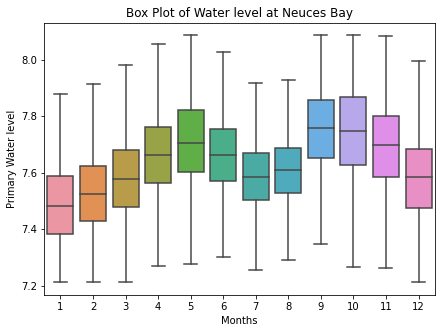

In [12]:
plt.subplots(figsize = (7,5))
sns.boxplot(x= df1_filtered['#date+time'].dt.month, y = df1_filtered['185-pwl'], data = df1_filtered, showfliers = False)
plt.xlabel("Months")
plt.ylabel("Primary Water level")
plt.title("Box Plot of Water level at Neuces Bay")

Text(0.5, 1.0, 'Boxen Plot of Water level at Neuces Bay')

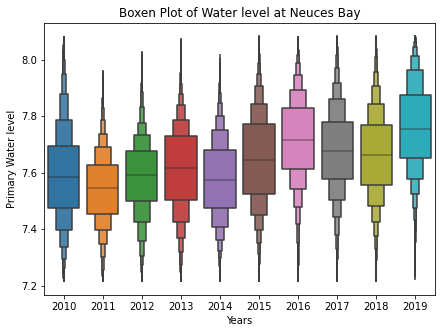

In [13]:
plt.subplots(figsize = (7,5))
sns.boxenplot(x= df1_filtered['#date+time'].dt.year, y = df1_filtered['185-pwl'], data = df1_filtered, showfliers = False)
plt.xlabel("Years")
plt.ylabel("Primary Water level")
plt.title("Boxen Plot of Water level at Neuces Bay")

Text(0.5, 1.0, 'Box Plot of Water level at Neuces Bay')

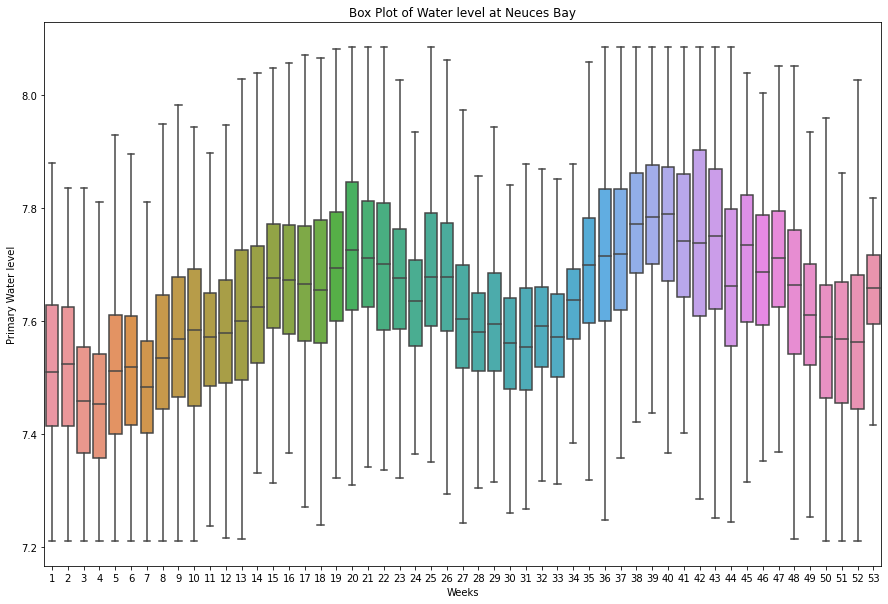

In [14]:
plt.subplots(figsize = (15,10))
sns.boxplot(x= df1_filtered['#date+time'].dt.isocalendar().week, y = df1_filtered['185-pwl'], data = df1_filtered, showfliers = False)
plt.xlabel("Weeks")
plt.ylabel("Primary Water level")
plt.title("Box Plot of Water level at Neuces Bay")

Text(0.5, 1.0, 'Boxen Plot of Water level at Neuces Bay')

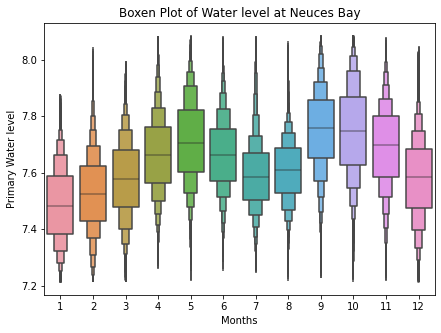

In [15]:
plt.subplots(figsize = (7,5))
sns.boxenplot(x= df1_filtered['#date+time'].dt.month, y = df1_filtered['185-pwl'], data = df1_filtered, showfliers = False)
plt.xlabel("Months")
plt.ylabel("Primary Water level")
plt.title("Boxen Plot of Water level at Neuces Bay")

In [16]:
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Weekday'] = data.index.weekday  
data['DOY'] = data.index.dayofyear

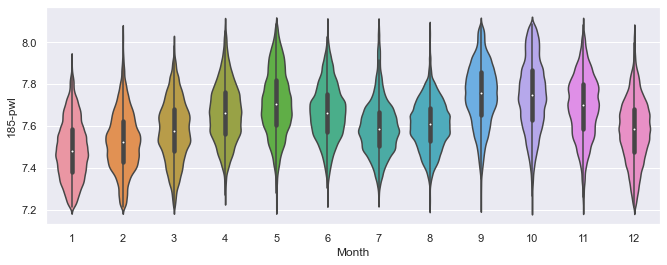

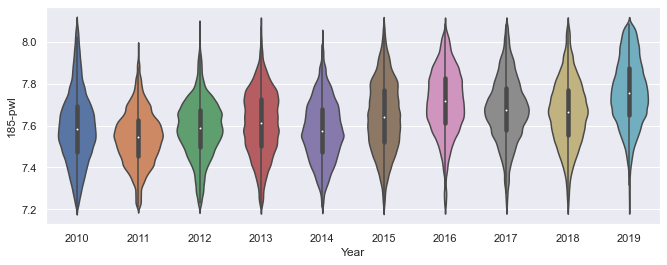

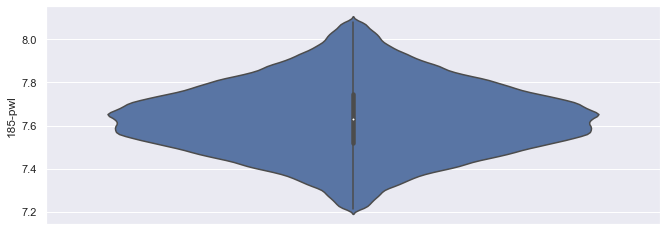

In [17]:
sns.set(rc={'figure.figsize':(11, 4)})
sns.violinplot(data=data, x='Month', y='185-pwl')
plt.show()
sns.violinplot(data=data, x='Year', y='185-pwl')
plt.show()
sns.violinplot(data=data,  y='185-pwl')
plt.show()

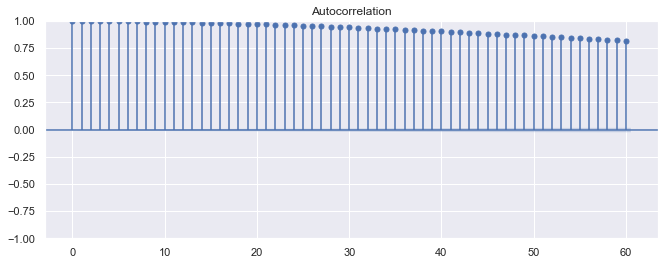

In [18]:
data = df1_filtered[['#date+time', '185-pwl']].set_index(['#date+time'])
plot_acf(data)
plt.show()

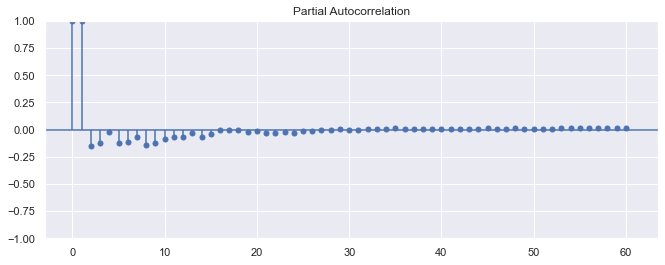

In [19]:
plot_pacf(data)
plt.show()

In [20]:
scipy.signal.periodogram(df1_filtered['185-pwl'], fs=1.0, window='boxcar', nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=- 1)

(array([0.00000000e+00, 1.19634970e-06, 2.39269940e-06, ...,
        4.99997607e-01, 4.99998804e-01, 5.00000000e-01]),
 array([9.72429041e-24, 2.21305960e+03, 5.22554091e+01, ...,
        5.46763070e-06, 3.85651900e-05, 1.04394862e-05]))

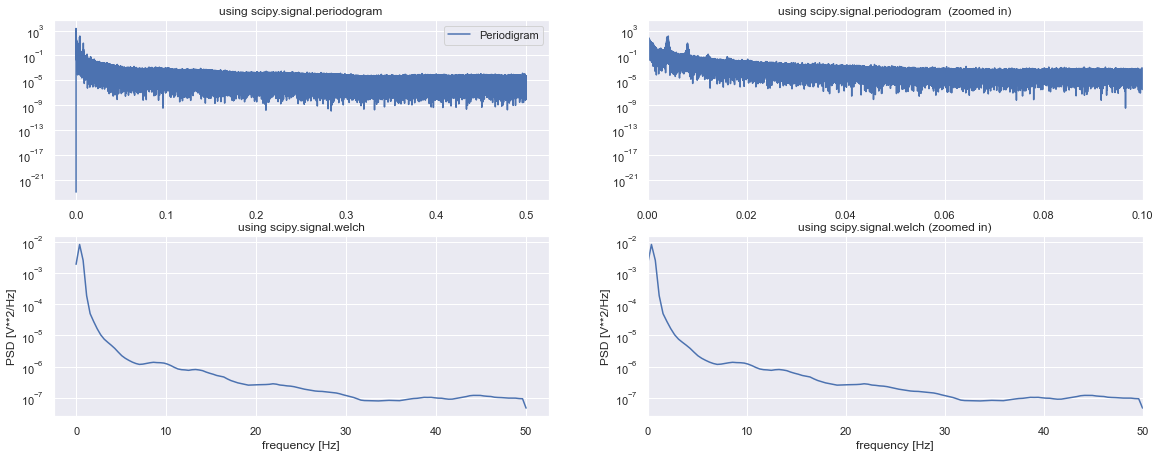

In [21]:
fig = plt.figure()
x = df1_filtered['185-pwl']
fs = 1
f, Pxx_den = scipy.signal.periodogram(x, fs)
    
fig.subplots_adjust(right=1.5)
fig.subplots_adjust(top=1.5)
ax1 = fig.add_subplot(221)
plt.title('using scipy.signal.periodogram')
plt.semilogy(f, Pxx_den)
ax2 = fig.add_subplot(222)
ax2.set_xlim(0, .1)
plt.title('using scipy.signal.periodogram  (zoomed in)')
plt.semilogy(f, Pxx_den)


ax3 = fig.add_subplot(223)

f, Pxx_den = scipy.signal.welch(x, fs=100)
plt.semilogy(f, Pxx_den)
plt.title('using scipy.signal.welch')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

ax4 = fig.add_subplot(224)

plt.title('using scipy.signal.welch (zoomed in)')
plt.semilogy(f, Pxx_den)
ax1.legend(['Periodigram']);

ax4.set_xlim(0, 50)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [22]:
data['pwl 1d'] = data['185-pwl'].rolling('1d').mean()
data['pwl 7d'] = data['185-pwl'].rolling('7d').mean()
data['pwl 28d'] = data['185-pwl'].rolling('28d').mean()
data['pwl 365d'] = data['185-pwl'].rolling('365d').mean()

<h3>We observe in the below graphs that there is a slighlty upwards trend to water levels, indicative of climate change<h3>

Text(0, 0.5, 'Primary Water Level')

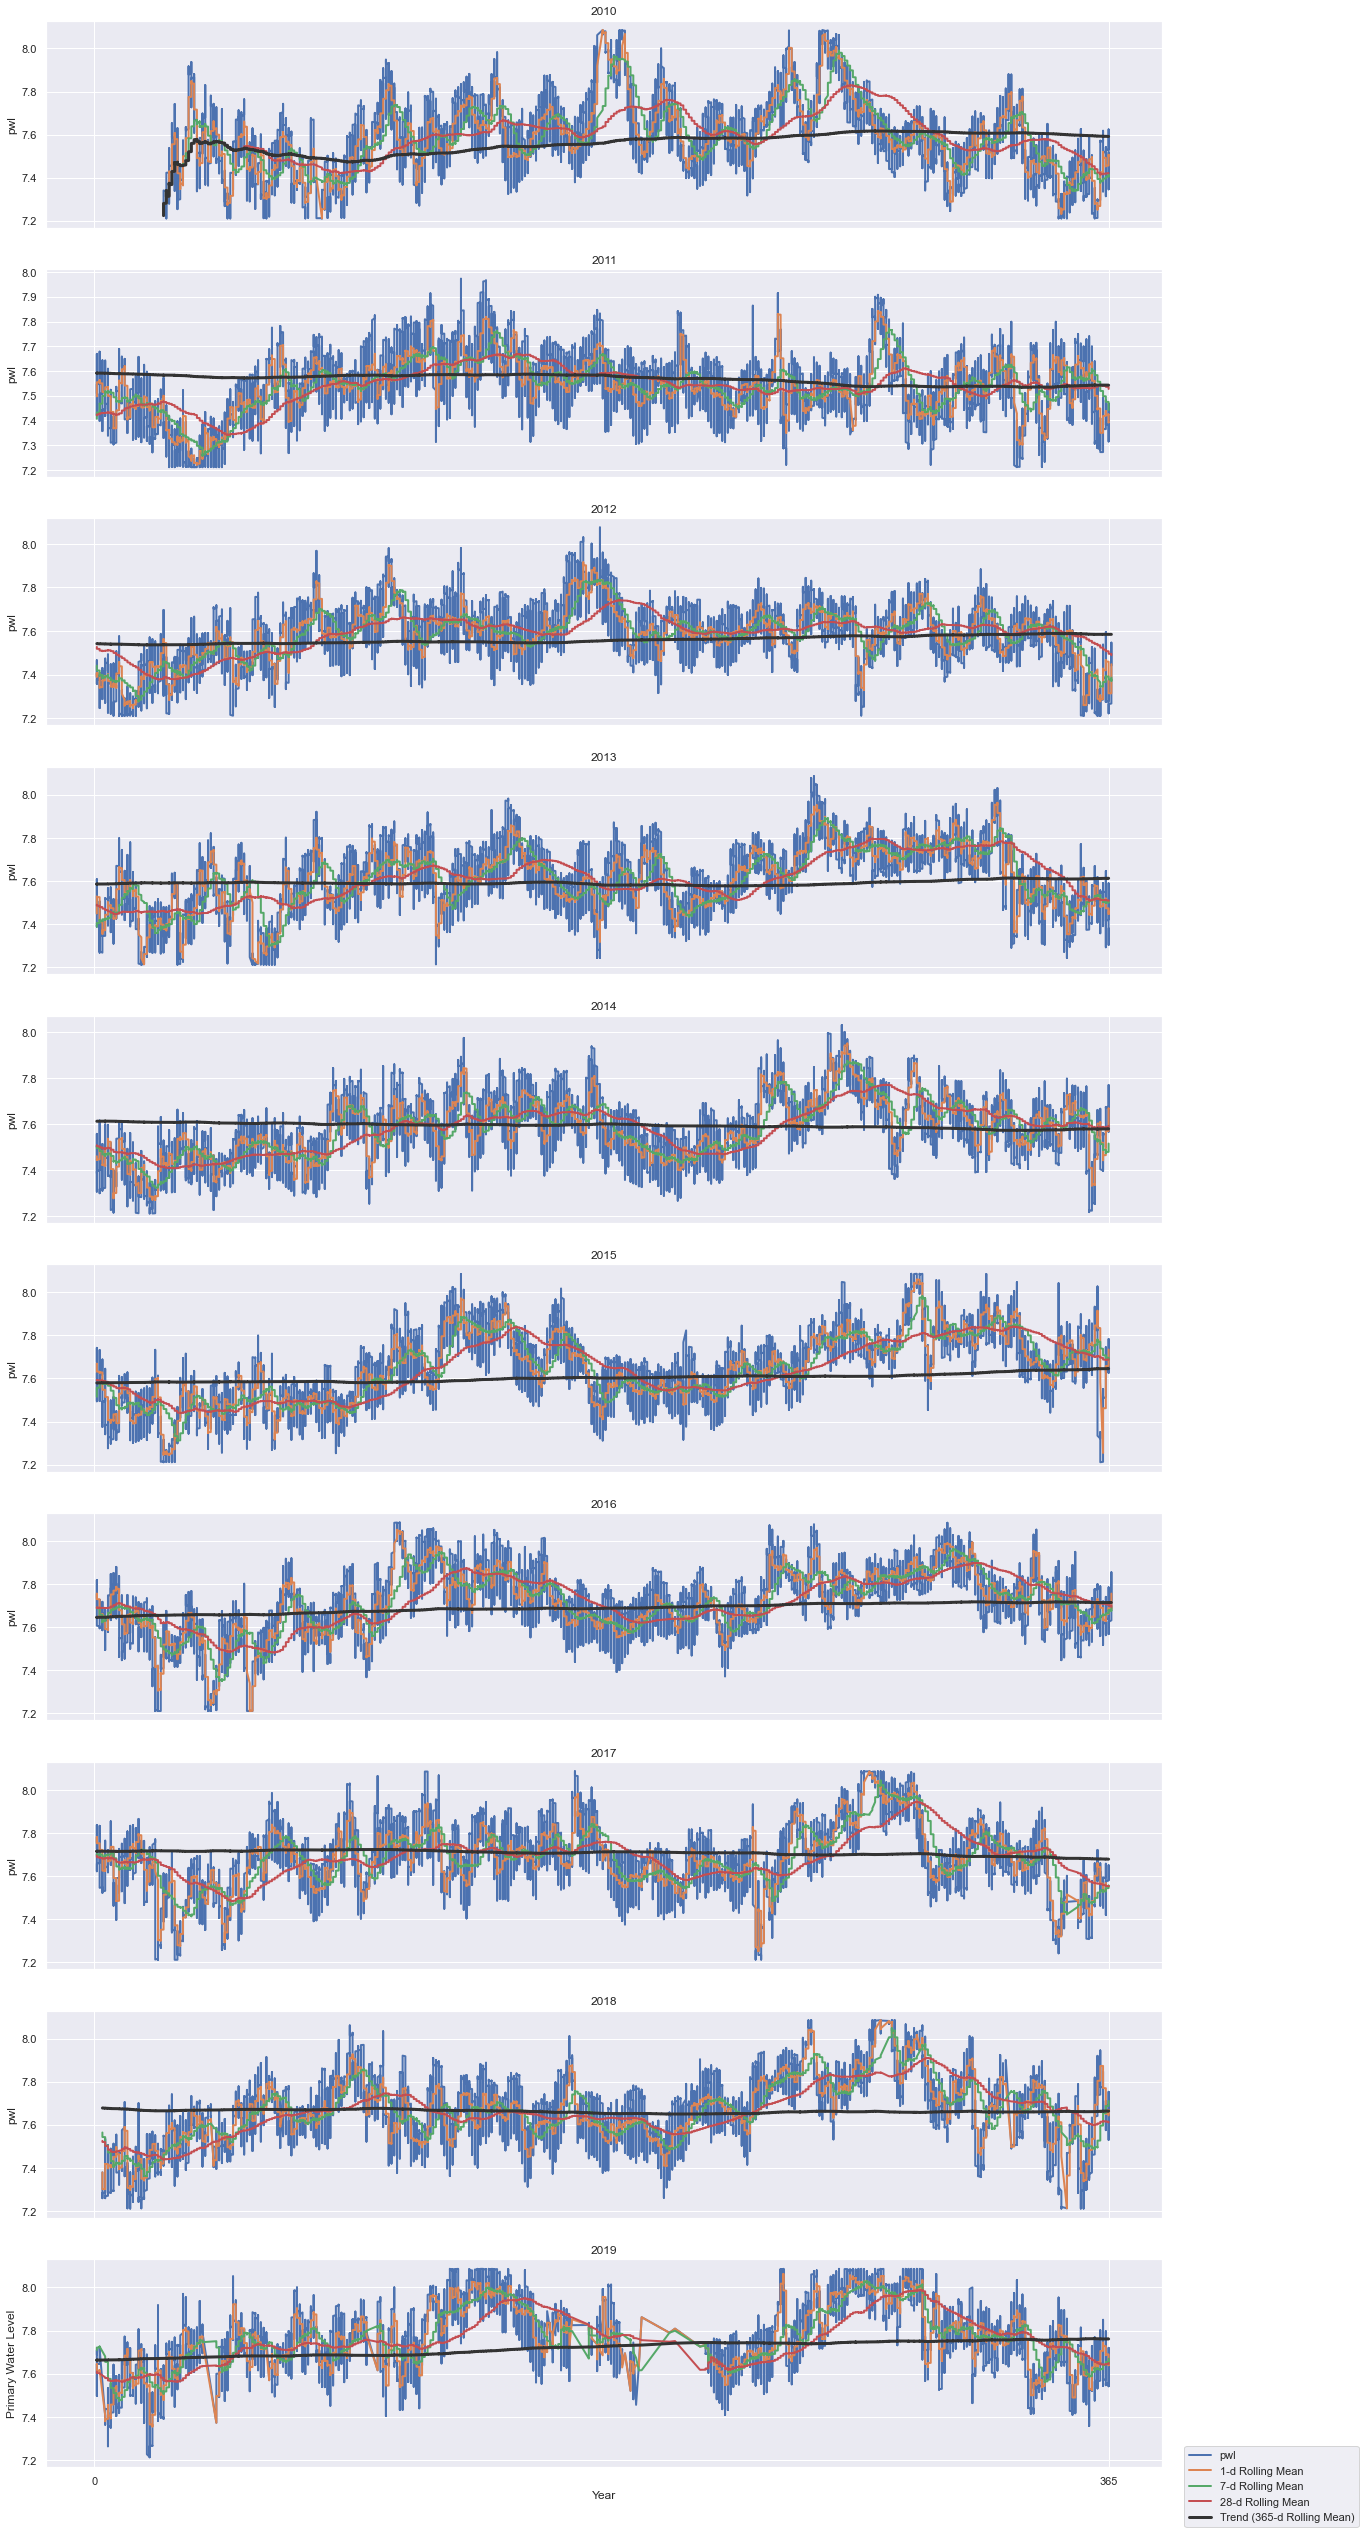

In [23]:
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Weekday'] = data.index.weekday  
data['DOY'] = data.index.dayofyear
Years = data.Year.unique()
numYears = len(Years)
fig, axes = plt.subplots(numYears, 1, figsize=(20, 45), sharex=True)
for yr, ax in zip(Years, axes):
        rows = data.query('Year == '+str(yr)).index
        yearrange = data.query('Year == '+str(yr))['DOY']
        
        ax.set_ylabel('pwl')
        ax.set_xlabel('Month')
        ax.set_title(yr)

        ax.plot(yearrange, data.loc[rows]['185-pwl'], linewidth=2, label='pwl')
        ax.plot(yearrange, data.loc[rows]['pwl 1d'], linewidth=2, label='1-d Rolling Mean')
        ax.plot(yearrange, data.loc[rows]['pwl 7d'], linewidth=2, label='7-d Rolling Mean')
        ax.plot(yearrange, data.loc[rows]['pwl 28d'], linewidth=2, label='28-d Rolling Mean')
        ax.plot(yearrange, data.loc[rows]['pwl 365d'], color='0.2', linewidth=3,label='Trend (365-d Rolling Mean)')
        ax.xaxis.set_major_locator(mdates.YearLocator())  

        if ax != axes[-1]:
            ax.set_xlabel('')

ax.legend(bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)
ax.set_xlabel('Year')
ax.set_ylabel('Primary Water Level')

<h3>Plotting Seasonal Decompose to observe trends over different cycles<h3>

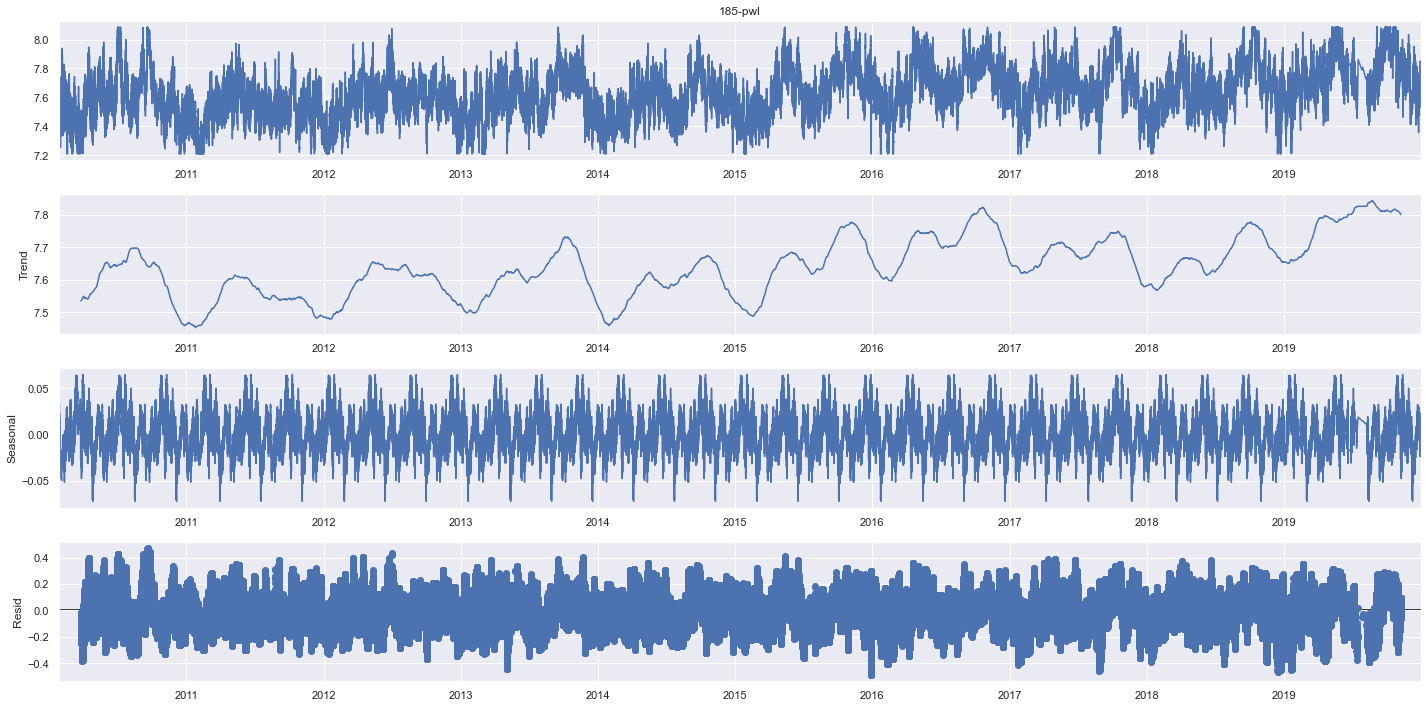

In [24]:
sns.set(rc={'figure.figsize':(20, 10)})
season1 = statsmodels.tsa.seasonal.seasonal_decompose(data['185-pwl'], model='additive', filt=None, period= math.ceil(len(data)/32), two_sided=True, extrapolate_trend=0)
season1.plot()
plt.show()

<h1>Manchester Houston<h1>

Reading data file

In [37]:
df2 = pd.read_csv('ManchesterHouston.csv')
df2

#date+time  513-pwl
0        1996-05-19T00:00:00Z    2.088
1        1996-05-19T00:06:00Z    2.089
2        1996-05-19T00:12:00Z    2.086
3        1996-05-19T00:18:00Z    2.083
4        1996-05-19T00:24:00Z    2.083
...                       ...      ...
2070475  2019-12-31T23:30:00Z    1.557
2070476  2019-12-31T23:36:00Z    1.549
2070477  2019-12-31T23:42:00Z    1.537
2070478  2019-12-31T23:48:00Z    1.527
2070479  2019-12-31T23:54:00Z    1.537

[2070480 rows x 2 columns]

Checking for NaNs

In [38]:
check_nan = df2['513-pwl'].isnull().values.any()
 
# printing the result
print (check_nan)

True


Finding total number of nan entries

In [39]:
df2.isna().sum().sum()

42415

Converting '#date+time' to datetime index

In [40]:
df22 = df2.copy()
df22['#date+time'] = pd.to_datetime(df22['#date+time'])
df22.index = df22['#date+time']
del df22['#date+time']

In [41]:
df22

513-pwl
#date+time                        
1996-05-19 00:00:00+00:00    2.088
1996-05-19 00:06:00+00:00    2.089
1996-05-19 00:12:00+00:00    2.086
1996-05-19 00:18:00+00:00    2.083
1996-05-19 00:24:00+00:00    2.083
...                            ...
2019-12-31 23:30:00+00:00    1.557
2019-12-31 23:36:00+00:00    1.549
2019-12-31 23:42:00+00:00    1.537
2019-12-31 23:48:00+00:00    1.527
2019-12-31 23:54:00+00:00    1.537

[2070480 rows x 1 columns]

Dropping nan values

In [42]:
#Dropping NAN
df22 = df22.dropna()
df22

513-pwl
#date+time                        
1996-05-19 00:00:00+00:00    2.088
1996-05-19 00:06:00+00:00    2.089
1996-05-19 00:12:00+00:00    2.086
1996-05-19 00:18:00+00:00    2.083
1996-05-19 00:24:00+00:00    2.083
...                            ...
2019-12-31 23:30:00+00:00    1.557
2019-12-31 23:36:00+00:00    1.549
2019-12-31 23:42:00+00:00    1.537
2019-12-31 23:48:00+00:00    1.527
2019-12-31 23:54:00+00:00    1.537

[2028065 rows x 1 columns]

Filling empty tuples using Forward Filling meathod

In [43]:
df22.asfreq('6min',method='ffill')

513-pwl
#date+time                        
1996-05-19 00:00:00+00:00    2.088
1996-05-19 00:06:00+00:00    2.089
1996-05-19 00:12:00+00:00    2.086
1996-05-19 00:18:00+00:00    2.083
1996-05-19 00:24:00+00:00    2.083
...                            ...
2019-12-31 23:30:00+00:00    1.557
2019-12-31 23:36:00+00:00    1.549
2019-12-31 23:42:00+00:00    1.537
2019-12-31 23:48:00+00:00    1.527
2019-12-31 23:54:00+00:00    1.537

[2070480 rows x 1 columns]

In [44]:
df22.isna().sum().sum()

0

In [45]:
df22

513-pwl
#date+time                        
1996-05-19 00:00:00+00:00    2.088
1996-05-19 00:06:00+00:00    2.089
1996-05-19 00:12:00+00:00    2.086
1996-05-19 00:18:00+00:00    2.083
1996-05-19 00:24:00+00:00    2.083
...                            ...
2019-12-31 23:30:00+00:00    1.557
2019-12-31 23:36:00+00:00    1.549
2019-12-31 23:42:00+00:00    1.537
2019-12-31 23:48:00+00:00    1.527
2019-12-31 23:54:00+00:00    1.537

[2028065 rows x 1 columns]

Removing outliers by calculating 1st and 99th quantile

In [46]:
q2_low = df22["513-pwl"].quantile(0.01)
q2_hi  = df22["513-pwl"].quantile(0.99)

df22_filtered = df22[(df22["513-pwl"] < q2_hi) & (df22["513-pwl"] > q2_low)]
df22_filtered

513-pwl
#date+time                        
1996-05-19 00:00:00+00:00    2.088
1996-05-19 00:06:00+00:00    2.089
1996-05-19 00:12:00+00:00    2.086
1996-05-19 00:18:00+00:00    2.083
1996-05-19 00:24:00+00:00    2.083
...                            ...
2019-12-31 23:30:00+00:00    1.557
2019-12-31 23:36:00+00:00    1.549
2019-12-31 23:42:00+00:00    1.537
2019-12-31 23:48:00+00:00    1.527
2019-12-31 23:54:00+00:00    1.537

[1987378 rows x 1 columns]

Making columns for years, months and days

In [52]:
df22_filtered['Year'] = df22_filtered.index.year
df22_filtered['Month'] = df22_filtered.index.month
df22_filtered['Weekday'] = df22_filtered.index.weekday  
df22_filtered['DOY'] = df22_filtered.index.dayofyear

C:\Users\apurv\AppData\Local\Temp\ipykernel_25412\2189678904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22_filtered['Year'] = df22_filtered.index.year
C:\Users\apurv\AppData\Local\Temp\ipykernel_25412\2189678904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22_filtered['Month'] = df22_filtered.index.month
C:\Users\apurv\AppData\Local\Temp\ipykernel_25412\2189678904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

<h2>Various Plots for Manchester Houston<h2>

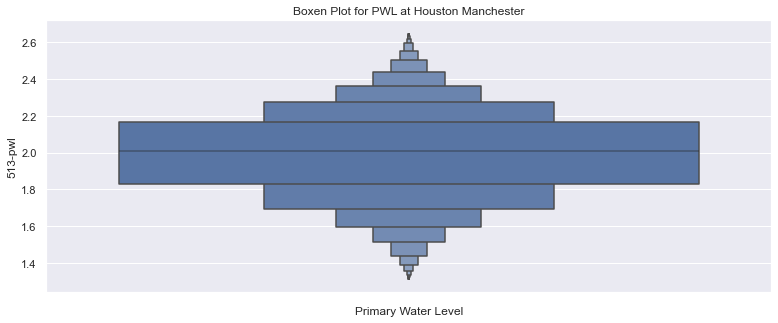

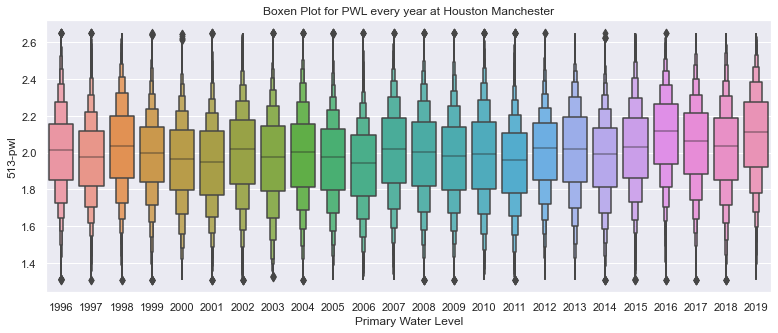

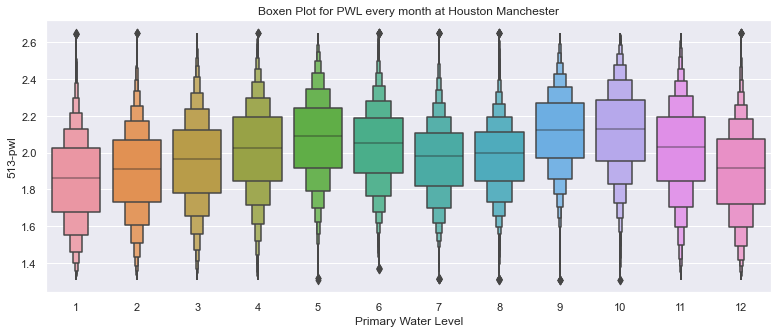

In [54]:
sns.set(rc={'figure.figsize':(13, 5)})
sns.boxenplot(data = df22_filtered, y = '513-pwl', showfliers = False)
plt.xlabel("Primary Water Level")
plt.title("Boxen Plot for PWL at Houston Manchester")
plt.show()
sns.boxenplot(data=df22_filtered, x='Year', y='513-pwl')
plt.xlabel("Primary Water Level")
plt.title("Boxen Plot for PWL every year at Houston Manchester")
plt.show()
sns.boxenplot(data=df22_filtered, x='Month', y='513-pwl')
plt.xlabel("Primary Water Level")
plt.title("Boxen Plot for PWL every month at Houston Manchester")
plt.show()

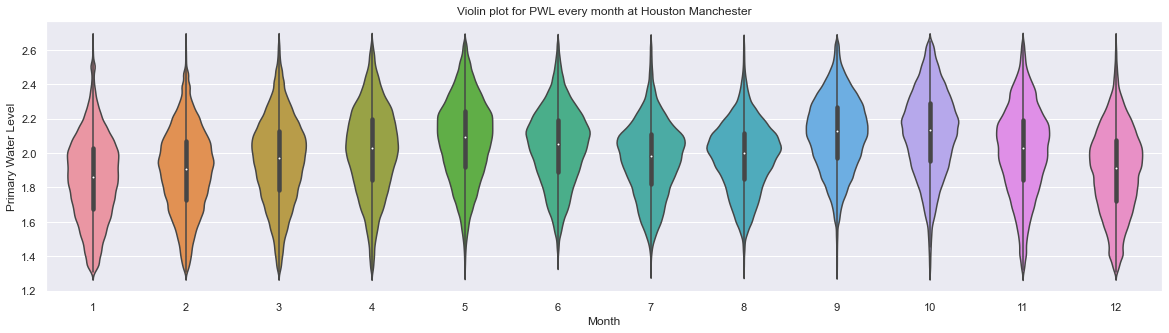

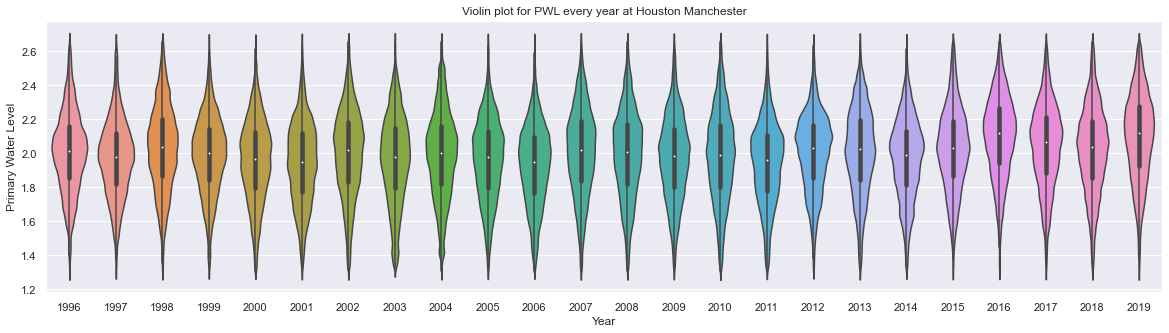

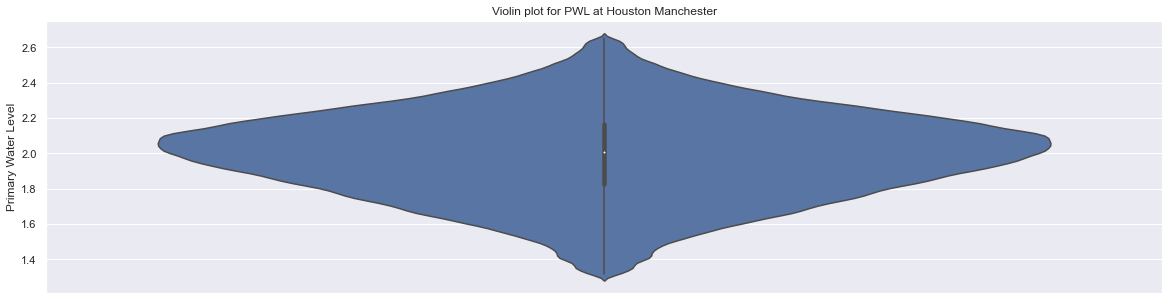

In [55]:
sns.set(rc={'figure.figsize':(20, 5)})
sns.violinplot(data=df22_filtered, x='Month', y='513-pwl')
plt.ylabel("Primary Water Level")
plt.title("Violin plot for PWL every month at Houston Manchester")
plt.show()
sns.violinplot(data=df22_filtered, x='Year', y='513-pwl')
plt.ylabel("Primary Water Level")
plt.title("Violin plot for PWL every year at Houston Manchester")
plt.show()
sns.violinplot(data=df22_filtered,  y='513-pwl')
plt.ylabel("Primary Water Level")
plt.title("Violin plot for PWL at Houston Manchester")
plt.show()

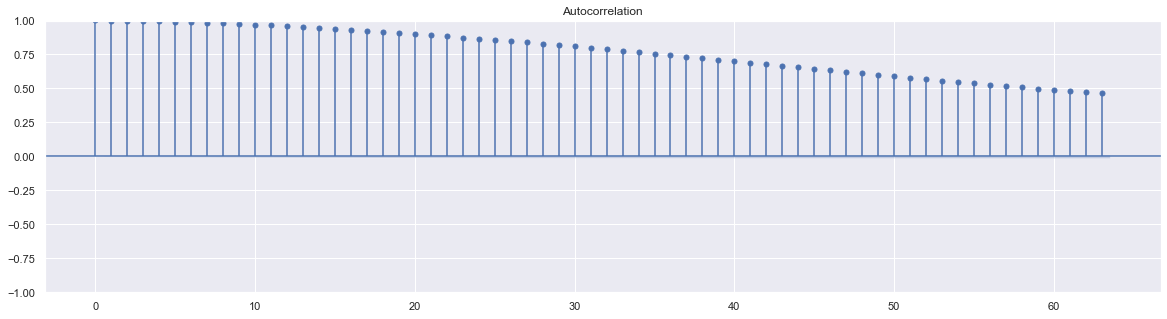

In [56]:
plot_acf(df22_filtered['513-pwl'])
plt.show()

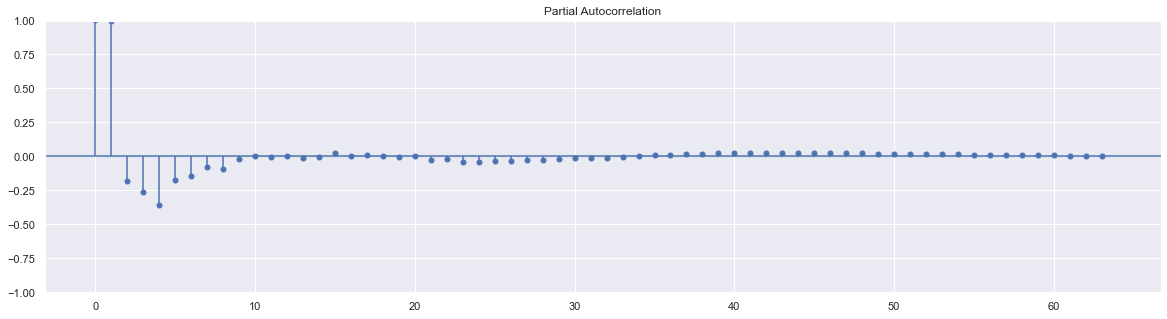

In [57]:
plot_pacf(df22_filtered['513-pwl'])
plt.show()

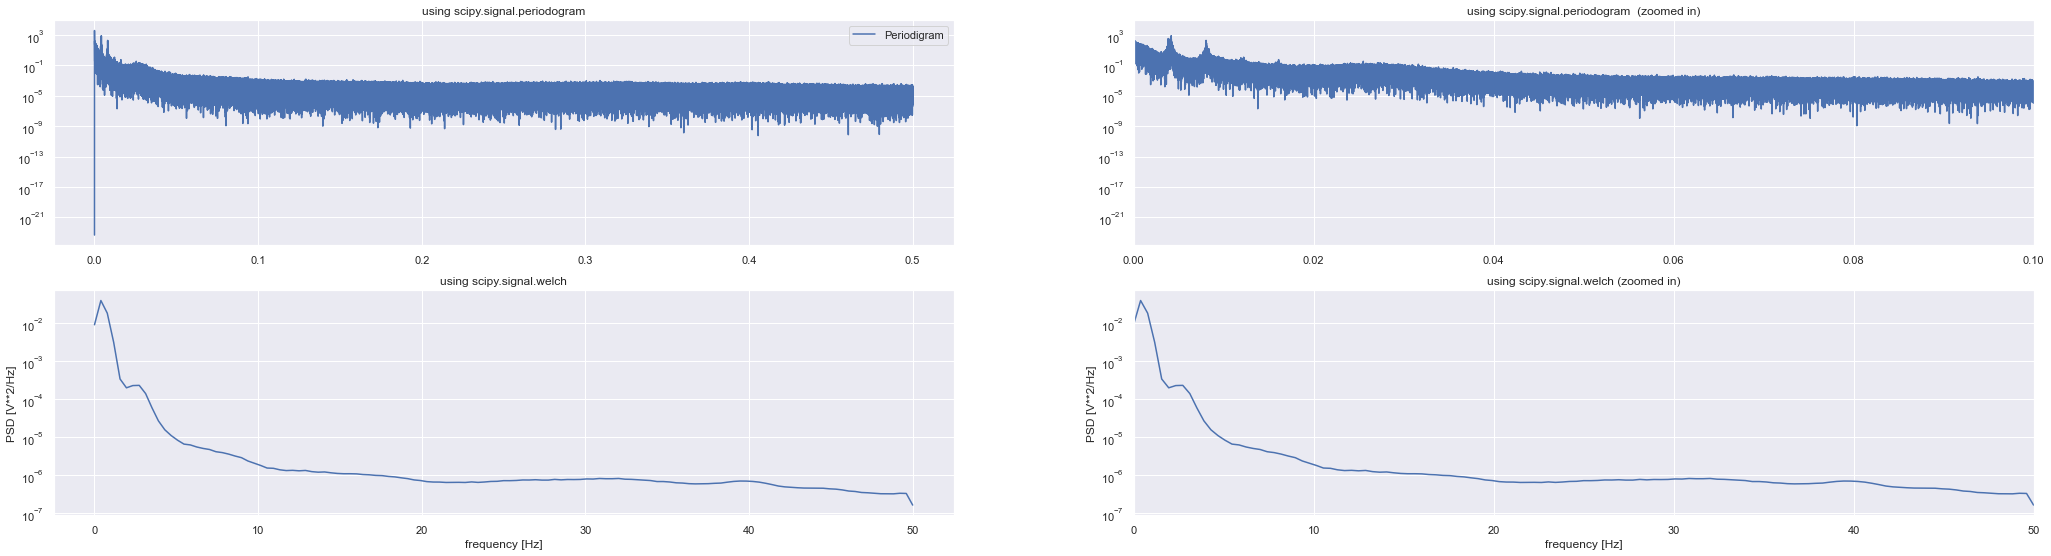

In [58]:
fig = plt.figure()
x = df22_filtered['513-pwl']
fs = 1
f, Pxx_den = scipy.signal.periodogram(x, fs)
    
fig.subplots_adjust(right=1.5)
fig.subplots_adjust(top=1.5)
ax1 = fig.add_subplot(221)
plt.title('using scipy.signal.periodogram')
plt.semilogy(f, Pxx_den)
ax2 = fig.add_subplot(222)
ax2.set_xlim(0, .1)
plt.title('using scipy.signal.periodogram  (zoomed in)')
plt.semilogy(f, Pxx_den)


ax3 = fig.add_subplot(223)

f, Pxx_den = scipy.signal.welch(x, fs=100)
plt.semilogy(f, Pxx_den)
plt.title('using scipy.signal.welch')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

ax4 = fig.add_subplot(224)

plt.title('using scipy.signal.welch (zoomed in)')
plt.semilogy(f, Pxx_den)
ax1.legend(['Periodigram']);

ax4.set_xlim(0, 50)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [59]:
df22_filtered['pwl 1d'] = df22_filtered['513-pwl'].rolling('1d').mean()
df22_filtered['pwl 7d'] = df22_filtered['513-pwl'].rolling('7d').mean()
df22_filtered['pwl 28d'] = df22_filtered['513-pwl'].rolling('28d').mean()
df22_filtered['pwl 365d'] = df22_filtered['513-pwl'].rolling('365d').mean()

C:\Users\apurv\AppData\Local\Temp\ipykernel_25412\4043694977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22_filtered['pwl 1d'] = df22_filtered['513-pwl'].rolling('1d').mean()
C:\Users\apurv\AppData\Local\Temp\ipykernel_25412\4043694977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22_filtered['pwl 7d'] = df22_filtered['513-pwl'].rolling('7d').mean()
C:\Users\apurv\AppData\Local\Temp\ipykernel_25412\4043694977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [60]:
df22_filtered

513-pwl  Year  Month  Weekday  DOY    pwl 1d  \
#date+time                                                                
1996-05-19 00:00:00+00:00    2.088  1996      5        6  140  2.088000   
1996-05-19 00:06:00+00:00    2.089  1996      5        6  140  2.088500   
1996-05-19 00:12:00+00:00    2.086  1996      5        6  140  2.087667   
1996-05-19 00:18:00+00:00    2.083  1996      5        6  140  2.086500   
1996-05-19 00:24:00+00:00    2.083  1996      5        6  140  2.085800   
...                            ...   ...    ...      ...  ...       ...   
2019-12-31 23:30:00+00:00    1.557  2019     12        1  365  1.746214   
2019-12-31 23:36:00+00:00    1.549  2019     12        1  365  1.746651   
2019-12-31 23:42:00+00:00    1.537  2019     12        1  365  1.747013   
2019-12-31 23:48:00+00:00    1.527  2019     12        1  365  1.747336   
2019-12-31 23:54:00+00:00    1.537  2019     12        1  365  1.747718   

                             pwl 7d   pwl 28d  pwl 365d  
#date+time                                               
1996-05-19 00:00:00+00:00  2.088000  2.088000  2.088000  
1996-05-19 00:06:00+00:00  2.088500  2.088500  2.088500  
1996-05-19 00:12:00+00:00  2.087667  2.087667  2.087667  
1996-05-19 00:18:00+00:00  2.086500  2.086500  2.086500  
1996-05-19 00:24:00+00:00  2.085800  2.085800  2.085800  
...                             ...       ...       ...  
2019-12-31 23:30:00+00:00  1.930712  1.930185  2.094343  
2019-12-31 23:36:00+00:00  1.930527  1.930148  2.094336  
2019-12-31 23:42:00+00:00  1.930328  1.930108  2.094328  
2019-12-31 23:48:00+00:00  1.930116  1.930069  2.094320  
2019-12-31 23:54:00+00:00  1.929893  1.930032  2.094312  

[1987378 rows x 9 columns]

Text(0, 0.5, 'Primary Water Level')

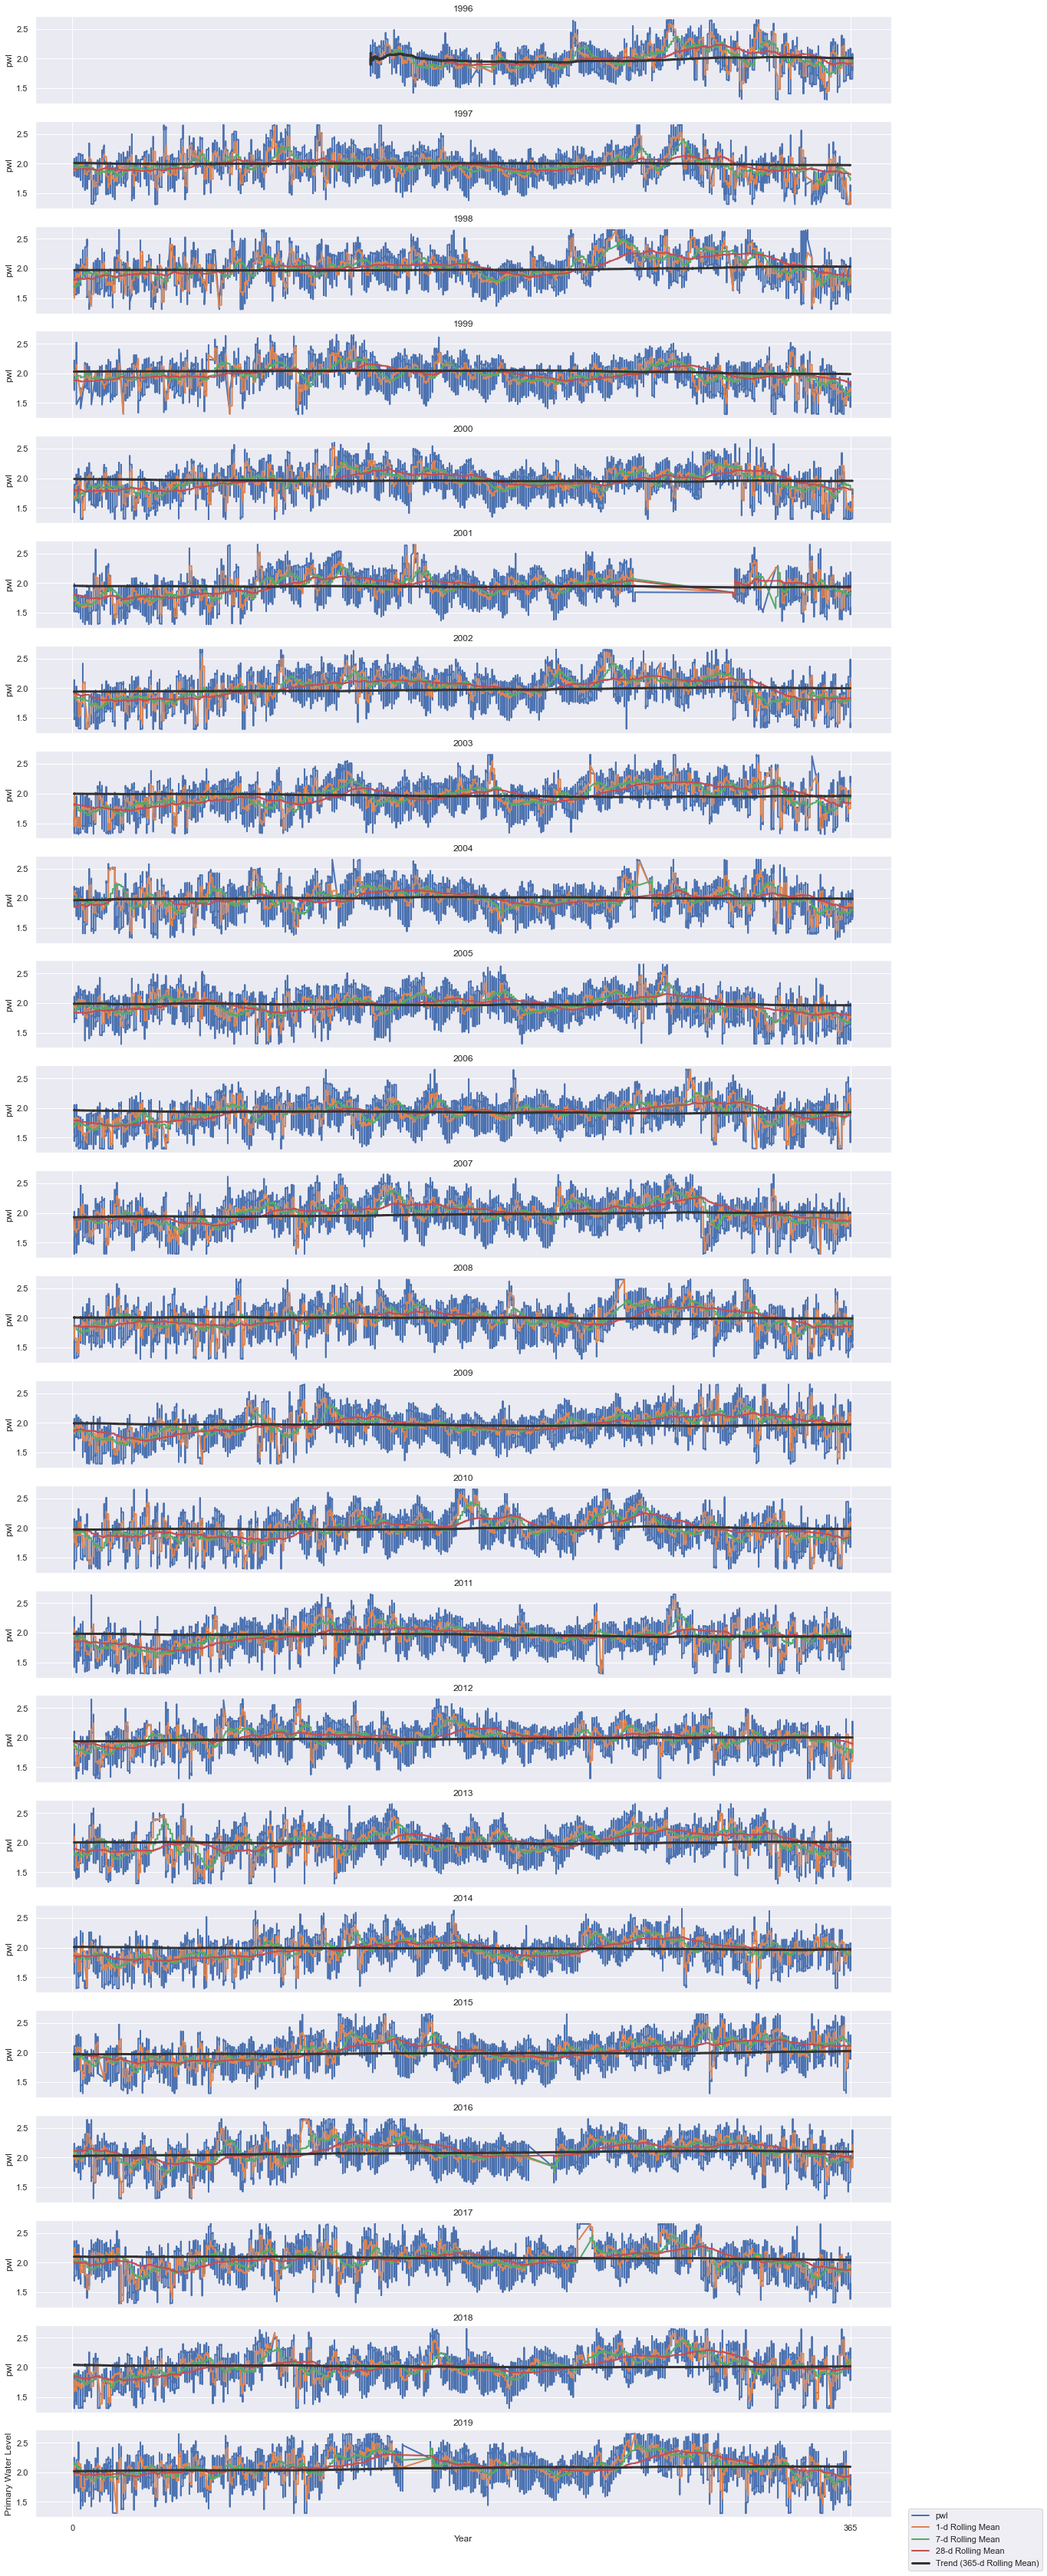

In [61]:
Years = df22_filtered.Year.unique()
numYears = len(Years)
fig, axes = plt.subplots(numYears, 1, figsize=(20, 60), sharex=True)
for yr, ax in zip(Years, axes):
        rows = df22_filtered.query('Year == '+str(yr)).index
        yearrange = df22_filtered.query('Year == '+str(yr))['DOY']

        ax.set_ylabel('pwl')
        ax.set_xlabel('Month')
        ax.set_title(yr)

        ax.plot(yearrange, df22_filtered.loc[rows]['513-pwl'], linewidth=2, label='pwl')
        ax.plot(yearrange, df22_filtered.loc[rows]['pwl 1d'], linewidth=2, label='1-d Rolling Mean')
        ax.plot(yearrange, df22_filtered.loc[rows]['pwl 7d'], linewidth=2, label='7-d Rolling Mean')
        ax.plot(yearrange, df22_filtered.loc[rows]['pwl 28d'], linewidth=2, label='28-d Rolling Mean')
        ax.plot(yearrange, df22_filtered.loc[rows]['pwl 365d'], color='0.2', linewidth=3,label='Trend (365-d Rolling Mean)')
        ax.xaxis.set_major_locator(mdates.YearLocator())  

        if ax != axes[-1]:
            ax.set_xlabel('')

ax.legend(bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)
ax.set_xlabel('Year')
ax.set_ylabel('Primary Water Level')
#ax.set_title('Trends in Houston Manchester Primary Walter Levl');

<h3>Plotting Seasonal Decompose to observe trends over different cycles<h3>

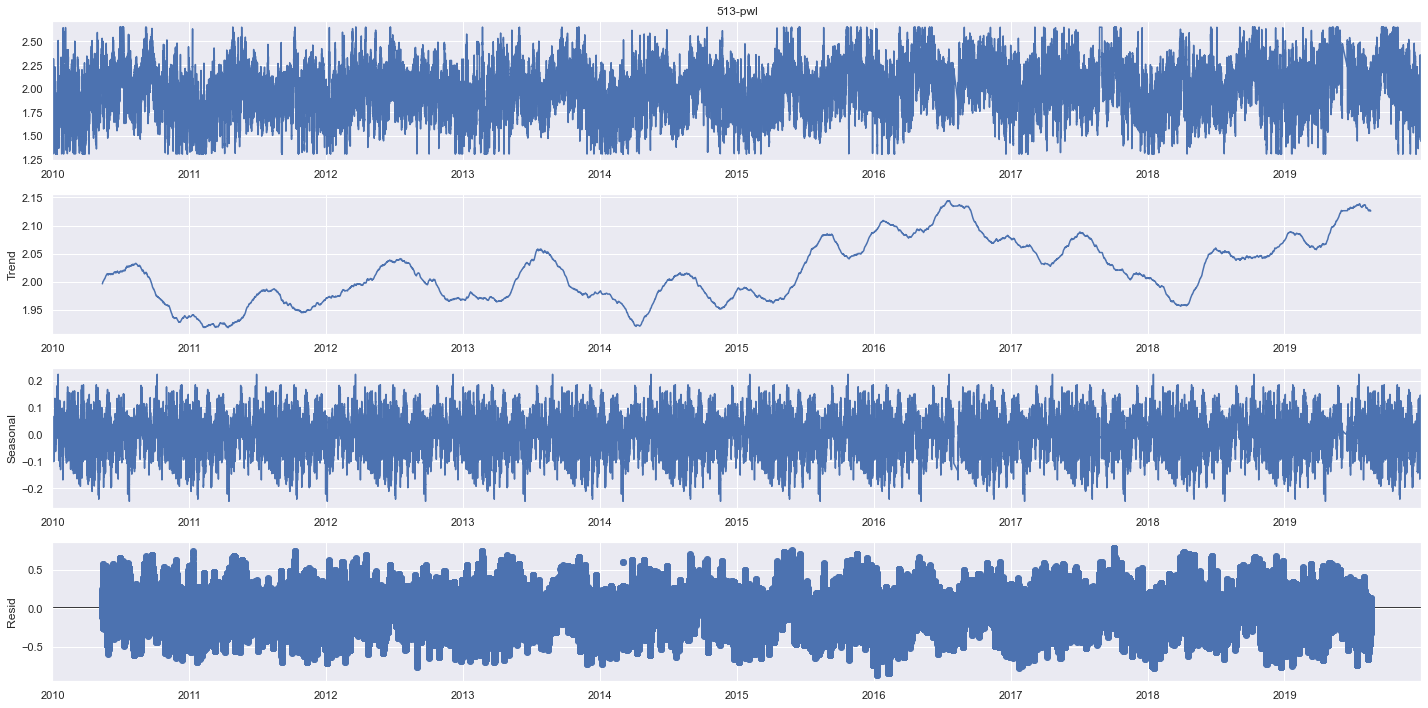

In [62]:
trend_year = df22_filtered.query('Year >= 2010')['513-pwl']
sns.set(rc={'figure.figsize':(20, 10)})
season2 = statsmodels.tsa.seasonal.seasonal_decompose(trend_year, model='additive', filt=None, period= math.ceil(len(df22_filtered['513-pwl'])/32), two_sided=True, extrapolate_trend=0)
season2.plot()
plt.show()

<h3>Comparisions<h3>
    <h4>We observe that the 2 locations have hardly any correlation.<br>
    This could be due to very different locations (Inland & Coast)<h4>

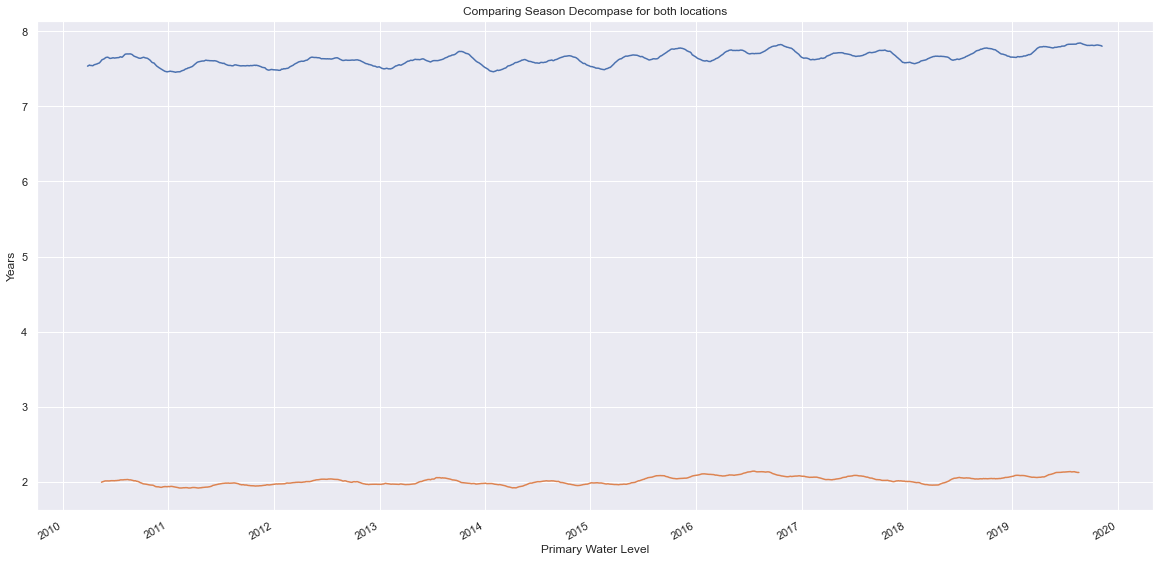

In [63]:
fig, axes1 = plt.subplots(figsize=(20, 10), sharex=True)
season1.trend.plot()
season2.trend.plot()
plt.xlabel("Primary Water Level")
plt.ylabel("Years")
plt.title("Comparing Season Decompase for both locations")
plt.show()

<h4>We plot the PWL for the 2 locations separately to observe peaks and dips<br>
    <br>
    For Neuces bay we observe constant double peaks every year, I think this is due to the seasons as Earth moves closer and away from the Sun.<br><br>
    We also see that the PWL is slowly increasing over the years. This could indicate rising water levels due to global warming or climate change.
    <br><br><br>
    For Manchester Houston we observe some peaks during the summer similar double peaks as that we saw in Neuces Bay.<br><br>
    We also see the Water level slightly increase over the years, indicative for climate change or global warming.
    <h4>

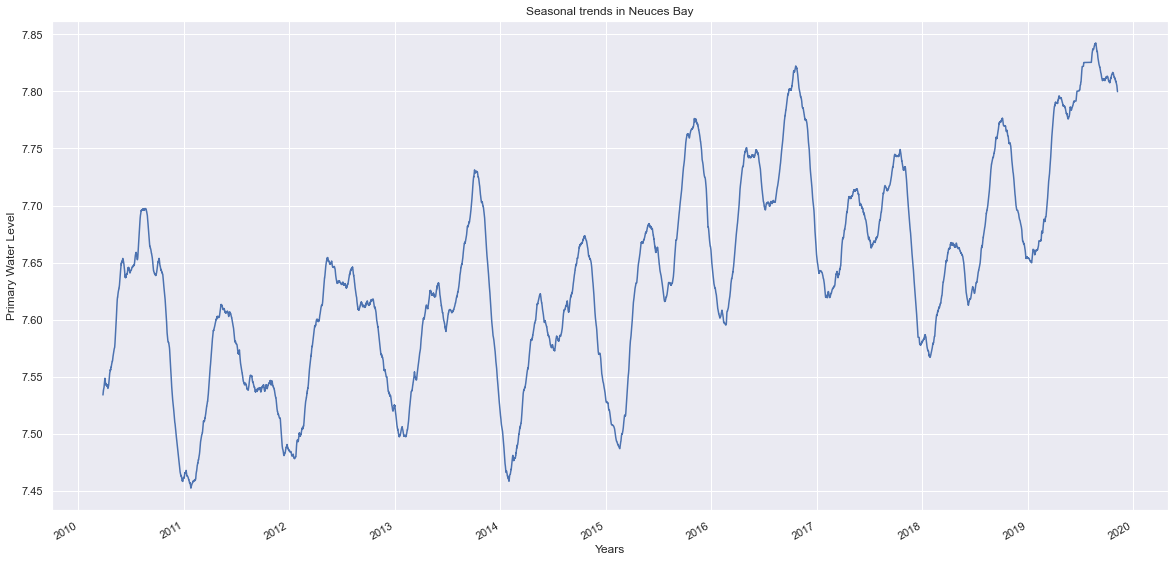

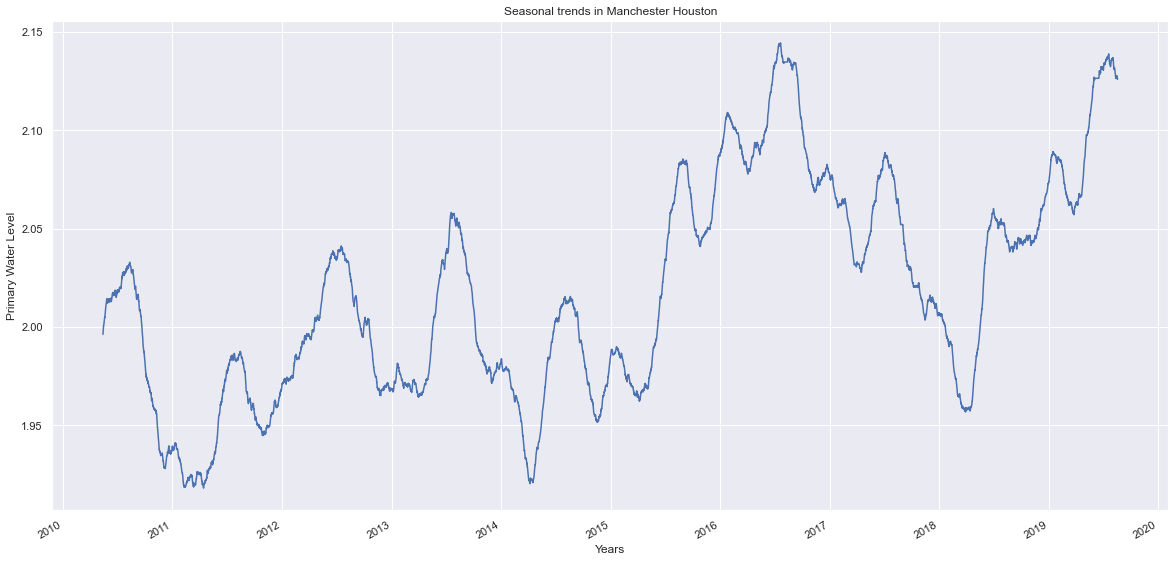

In [64]:
season1.trend.plot()
plt.xlabel("Years")
plt.ylabel("Primary Water Level")
plt.title("Seasonal trends in Neuces Bay")
plt.show()
season2.trend.plot()
plt.xlabel("Years")
plt.ylabel("Primary Water Level")
plt.title("Seasonal trends in Manchester Houston")
plt.show()

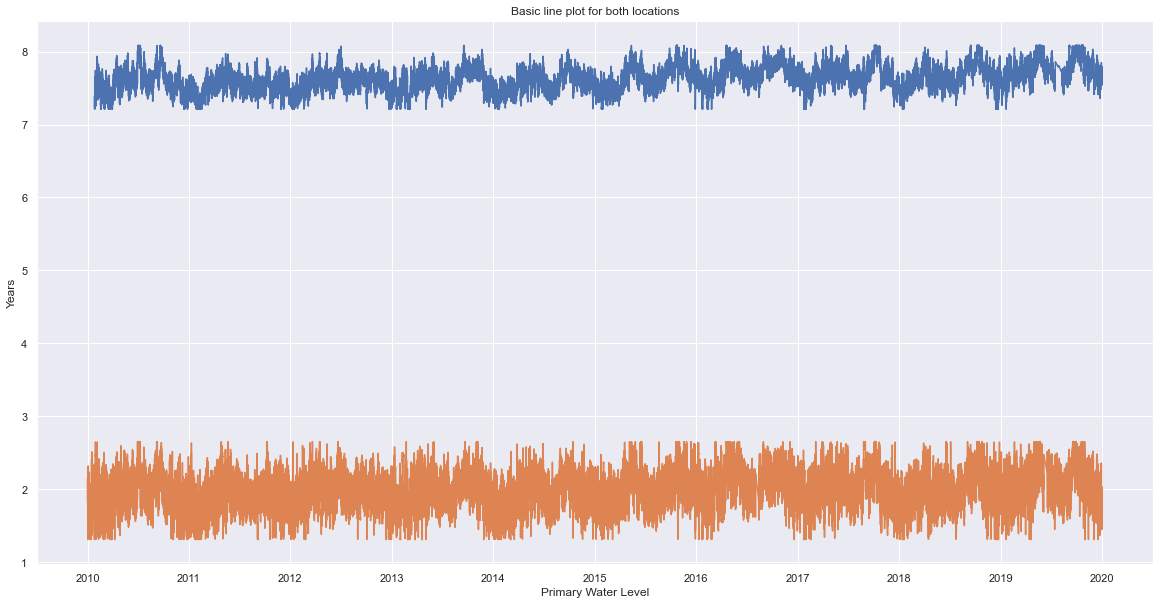

In [65]:
fig, axes2 = plt.subplots(figsize=(20, 10), sharex=True)
plt.plot(data['185-pwl'])
plt.plot(trend_year)
plt.xlabel("Primary Water Level")
plt.ylabel("Years")
plt.title("Basic line plot for both locations")
plt.show()

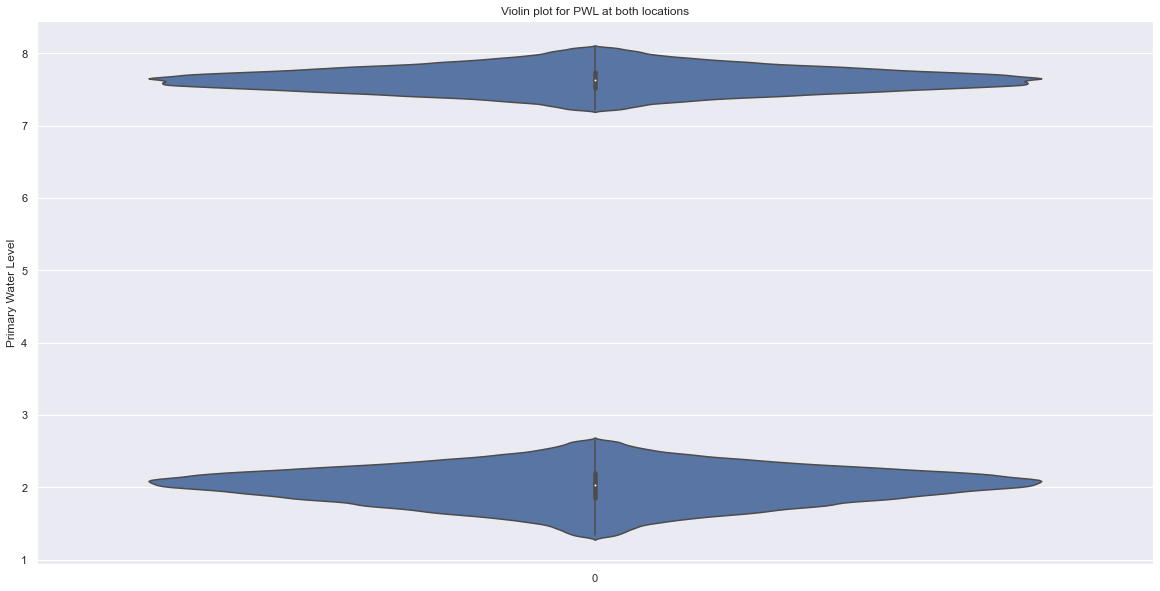

In [66]:
fig, axes3 = plt.subplots(figsize=(20, 10), sharex=True)
sns.violinplot(data=data,  y='185-pwl')
sns.violinplot(data=trend_year)
plt.ylabel("Primary Water Level")
plt.title("Violin plot for PWL at both locations")
plt.show()